In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
ds = pd.read_csv('candle_new.csv')
ds

,company location,Years in business,name,candle type,scented,fragrance,size in ml,package rating,shipping,rating,price in rs,sale frequency
0,Bangalore,5,sun,pillar,yes,vanilla,200,4.0,pan,4.50,250,once every 2 months
1,Bangalore,5,sun,pillar,yes,coffee,200,4.0,pan,4.00,250,once every 2 months
2,Bangalore,5,sun,pillar,yes,chocolate,200,4.0,pan,3.00,250,once every 2 months
3,Bangalore,5,sun,pillar,yes,rose,200,4.0,pan,3.00,250,once every 2 months
4,Bangalore,5,sun,pillar,yes,citrus,200,4.0,pan,4.20,250,once every 2 months
...,...,...,...,...,...,...,...,...,...,...,...,...
475,Kerala,15,Thunder,shaped,yes,citrus,100,2.3,pan,3.30,452,once a month
476,Kerala,15,Thunder,shaped,yes,tea tree,100,2.3,pan,3.40,365,once a month
477,Kerala,15,Thunder,shaped,yes,ocean,100,2.3,pan,3.53,326,once a month
478,Kerala,15,Thunder,shaped,no,no,200,2.3,pan,3.65,332,once a month


In [26]:
ds.shape

(480, 12)

In [4]:
ds.isnull().sum()

company location     0
Years in business    0
name                 0
candle type          0
scented              0
fragrance            0
size in ml           0
package rating       0
shipping             0
rating               0
price in rs          0
sale frequency       0
dtype: int64

In [5]:
catcols = [col for col in ds.columns if ds[col].dtype=='O']
catcols

['company location',
 'name',
 'candle type',
 'scented ',
 'fragrance',
 'shipping',
 'sale frequency']

In [6]:
from sklearn import preprocessing
enc = preprocessing.LabelEncoder()

In [7]:
for i in catcols:
    ds = pd.concat((pd.get_dummies(ds[i]),ds),axis=1)
    ds = ds.drop([i],axis=1)
    ds = ds.rename(columns={ds.columns[0]:i})
    ds = ds.drop([ds.columns[1]],axis=1)

In [8]:
catcols = [col for col in ds.columns if ds[col].dtype=='O']
catcols

[]

In [9]:
ds

,sale frequency,once every 2 months,once every 6 months,shipping,coffee,no,ocean,rose,tea tree,vanilla,...,Hyderabad,Kerala,Mangalore,Mumbai,Pune,Years in business,size in ml,package rating,rating,price in rs
0,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,5,200,4.0,4.50,250
1,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,5,200,4.0,4.00,250
2,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,5,200,4.0,3.00,250
3,0,1,0,1,0,0,0,1,0,0,...,0,0,0,0,0,5,200,4.0,3.00,250
4,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,5,200,4.0,4.20,250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,15,100,2.3,3.30,452
476,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,15,100,2.3,3.40,365
477,0,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,15,100,2.3,3.53,326
478,0,0,0,1,0,1,0,0,0,0,...,0,1,0,0,0,15,200,2.3,3.65,332


In [10]:
 ds = pd.concat((pd.get_dummies(ds['size in ml']),ds),axis=1)
 ds = ds.drop(['size in ml'],axis=1)
 ds = ds.rename(columns={ds.columns[0]:'size in ml'})
 ds = ds.drop([ds.columns[1]],axis=1)

In [11]:
ds

,size in ml,sale frequency,once every 2 months,once every 6 months,shipping,coffee,no,ocean,rose,tea tree,...,Goa,Hyderabad,Kerala,Mangalore,Mumbai,Pune,Years in business,package rating,rating,price in rs
0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,5,4.0,4.50,250
1,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,5,4.0,4.00,250
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,5,4.0,3.00,250
3,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,5,4.0,3.00,250
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,5,4.0,4.20,250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,15,2.3,3.30,452
476,1,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,15,2.3,3.40,365
477,1,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,15,2.3,3.53,326
478,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,15,2.3,3.65,332


In [12]:
x = ds.drop(['price in rs'],axis=1)
y = ds['price in rs']

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [14]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
mm.fit(x_train)
x_train = mm.transform(x_train)
x_test = mm.transform(x_test)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
le = LinearRegression()
le.fit(x_train,y_train)

LinearRegression()

In [17]:
pred = le.predict(x_test)
pred

array([134., 150., 276., 283., 546., 410., 863., 248., 244., 856., 180.,
       310., 762.,  25., 515., 519., 364., 628., 180., 851., 526., 714.,
       417., 736., 295., 125., 336., 599., 259., 291.,  42., 282., 489.,
       367., 384., 272., 285., 371., 484., 605., 291., 513., 165., 206.,
       342., 712., 278., 496., 268., 190., 506., 566., 251.,  83., 710.,
       142., 202., 625., 537., 276., 415., 130., 524., 374., 744., 758.,
       372., 250., 508., 416., 375., 537., 146., 600., 361.,  39., 656.,
       610., 585., 304.,  61., 384., 138., 265., 114., 461., 607., 191.,
       383., 722., 187., 530., 436., 190., 619., 359.])

Text(0, 0.5, 'predicted')

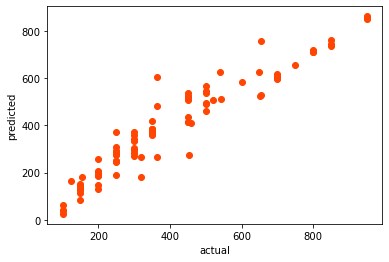

In [18]:
plt.scatter(y_test,pred,color='orangered')
plt.xlabel('actual')
plt.ylabel('predicted')

In [19]:
import seaborn as sns

<AxesSubplot:xlabel='price in rs'>

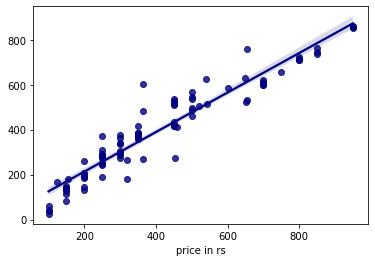

In [20]:
sns.regplot(x=y_test,y=pred,color ='navy')

In [21]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':pred,'Difference':y_test-pred})
pred_df

,Actual Value,Predicted Value,Difference
11,150,134.0,16.0
156,150,150.0,0.0
475,452,276.0,176.0
6,250,283.0,-33.0
265,500,546.0,-46.0
...,...,...,...
374,654,530.0,124.0
82,450,436.0,14.0
430,250,190.0,60.0
216,700,619.0,81.0


In [22]:
from sklearn.metrics import r2_score
Accuracy=r2_score(y_test,pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 90.60


In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

        25.0       0.00      0.00      0.00         0
        39.0       0.00      0.00      0.00         0
        42.0       0.00      0.00      0.00         0
        61.0       0.00      0.00      0.00         0
        83.0       0.00      0.00      0.00         0
       100.0       0.00      0.00      0.00         4
       114.0       0.00      0.00      0.00         0
       123.0       0.00      0.00      0.00         1
       125.0       0.00      0.00      0.00         0
       130.0       0.00      0.00      0.00         0
       134.0       0.00      0.00      0.00         0
       138.0       0.00      0.00      0.00         0
       142.0       0.00      0.00      0.00         0
       146.0       0.00      0.00      0.00         0
       150.0       1.00      0.14      0.25         7
       154.0       0.00      0.00      0.00         1
       165.0       0.00      0.00      0.00         0
       180.0       0.00    

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classif